In [1]:
from __future__ import division
from aqchem.chemistry import Solute
from aqchem.equilibria import Equilibrium, EqSystem, charge_balance, atom_balance, REqSystem
import periodictable
import numpy as np

In [2]:
substances = Hp, OHm, NH4p, NH3, H2O = [
    Solute(n, formula=periodictable.formula(n)) for n in [
        'H{+}', 'HO{-}', 'NH3 + H{+}', 'NH3', 'H2O']]
assert (Hp.charge, OHm.charge, NH4p.charge, NH3.charge, H2O.charge) == (1, -1, 1, 0, 0)
init_conc = {Hp: 1e-7, OHm: 1e-7, NH4p: 1e-7, NH3: 1.0, H2O: 55.5}
x0 = [init_conc[k] for k in substances]
H2O_c = init_conc[H2O]
w_autop = Equilibrium({H2O: 1}, {Hp: 1, OHm: 1}, 10**-14/H2O_c)
NH4p_pr = Equilibrium({NH4p: 1}, {Hp: 1, NH3: 1}, 10**-9.26)
equilibria = w_autop, NH4p_pr

In [3]:
reqsys = REqSystem(equilibria, substances)
reqsys.root(init_conc, scaling=1.0)

[ 0.  0.]
[ -5.00001675e-08  -5.00001675e-08]
[ -5.00001675e-08  -5.00001675e-08]
[ -5.00001675e-08  -5.00001675e-08]
[ -5.00001675e-08  -5.00001675e-08]
[ -5.00001675e-08  -5.00001675e-08]
[ -5.00001675e-08  -5.00001675e-08]
[ -5.00001675e-08  -5.00001675e-08]
[ -5.00001675e-08  -5.00001675e-08]
[ -5.00001675e-08  -5.00001675e-08]
[ -5.00001675e-08  -5.00001675e-08]


aqchem/equilibria.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  tot *= c[idx]**nr


(array([  2.34917093e-12,   4.25649277e-03,   4.25659277e-03,
          9.95743507e-01,   5.54957436e+01]),
   status: 1
 success: True
     qtf: array([  1.89913751e-18,  -7.13301256e-23])
    nfev: 54
       r: array([ -2.33929709e+02,  -2.33929709e+02,  -1.13686838e-13])
     fun: array([ -7.19528032e-23,  -1.89913751e-18])
       x: array([ 0.00425639, -0.00425649])
 message: 'The solution converged.'
    fjac: array([[ -3.27873899e-07,  -1.00000000e+00],
       [  1.00000000e+00,  -3.27873899e-07]])
    njev: 6)

In [4]:
reaction_system = EqSystem(equilibria, substances)

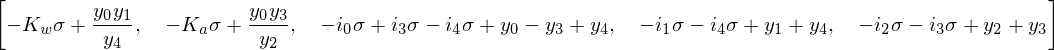

In [5]:
import sympy as sp
sp.init_printing()
ny = len(substances)
y = sp.symarray('y', ny)
i = sp.symarray('i', ny)
Kw, Ka, sigma = sp.symbols('K_w K_a sigma')
w_autop.params = Kw
NH4p_pr.params = Ka
rs = EqSystem(equilibria, substances)
f = rs.f(y, i, scaling=sigma)
f

In [6]:
j = sp.Matrix(1, len(y), lambda _, q: f[q]).jacobian(y)
jarr = np.array(j.subs(zip(y,x0)))
jarr = np.asarray(jarr, dtype=np.float64)
np.linalg.inv(jarr)

array([[  1.85000006e+08,   3.33333311e-08,   3.33333345e-01,
         -3.33333344e-01,   3.33333311e-01],
       [  3.69999993e+08,  -3.33333311e-08,  -3.33333344e-01,
          3.33333345e-01,  -3.33333311e-01],
       [  1.84999987e+08,  -6.66666622e-08,   3.33333311e-01,
         -3.33333311e-01,   3.33333378e-01],
       [ -1.84999987e+08,   6.66666622e-08,  -3.33333311e-01,
          3.33333311e-01,   6.66666622e-01],
       [ -3.69999993e+08,   3.33333311e-08,   3.33333344e-01,
          6.66666655e-01,   3.33333311e-01]])

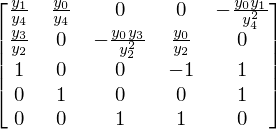

In [7]:
j

In [8]:
[s.name for s in rs.substances]

['H{+}', 'HO{-}', 'NH3 + H{+}', 'NH3', 'H2O']

In [9]:
rs.charge_balance_vector(), rs.atom_balance_vectors()

In [10]:
rs.rref()

In [11]:
np.set_printoptions(4, linewidth=120)
scaling = 1e8
for rxn in rs.rxns:
    rxn.params = rxn.params.subs({Kw: 1e-14, Ka: 10**-9.26})

In [12]:
x, res = rs.root(x0, scaling=1, logC=False, square=False)
res.success

True

In [13]:
x, res = rs.root({Hp: 1e-11, OHm: 1e-3, NH4p: 1e-3, NH3: 1.0, H2O: 55.5}, scaling=1, logC=False, square=False)
res.success

True

In [14]:
x, res = rs.root({Hp: 1.7e-11, OHm: 3e-2, NH4p: 3e-2, NH3: 0.97, H2O: 55.5}, scaling=1e8, logC=False, square=False)
res.success

True

In [15]:
x, res = rs.root({Hp: 1.7e-11, OHm: 3e-2, NH4p: 3e-2, NH3: 0.97, H2O: 55.5}, scaling=1e16, logC=True, square=False)
x

array([  1.7748e-11,   3.0000e-02,   3.0000e-02,   9.7000e-01,   5.5500e+01])

In [16]:
rs.root(x0, scaling=1e8, logC=False, square=False)

(array([  1.7739e-11,   3.1270e-02,   3.1270e-02,   9.6873e-01,   5.5469e+01]),
   status: 1
 success: True
     qtf: array([ -2.2150e-10,   2.1725e-23,   1.2001e-19,  -2.7206e-12,   2.1104e-15])
    nfev: 57
       r: array([ -8.1420e+01,   9.7792e-14,   2.0581e-09,   1.2282e-02,  -1.2282e-02,   1.0000e+00,   1.1051e-04,  -2.8704e-13,
         1.0000e+00,  -1.0000e+00,  -1.0000e+00,  -4.4108e-08,  -9.9992e-01,   9.9992e-01,   2.4729e-13])
     fun: array([  5.3638e-19,  -3.7755e-14,   0.0000e+00,   0.0000e+00,   0.0000e+00])
       x: array([  1.7739e-11,   3.1270e-02,   3.1270e-02,   9.6873e-01,   5.5469e+01])
 message: 'The solution converged.'
    fjac: array([[ -2.6858e-06,  -9.9992e-01,  -1.2282e-02,   9.8086e-14,  -8.4699e-22],
       [  6.1356e-13,   9.8079e-14,   1.2042e-15,   1.0000e+00,   4.9982e-26],
       [  3.7521e-13,   5.4178e-10,  -4.4108e-08,  -3.3875e-23,  -1.0000e+00],
       [ -3.2990e-08,  -1.2282e-02,   9.9992e-01,  -1.2123e-19,  -4.4111e-08],
       [ -1.0000e+

In [17]:
rs.root(x0, scaling=1, logC=False, square=False)

(array([  1.7739e-11,   3.1270e-02,   3.1270e-02,   9.6873e-01,   5.5469e+01]),
   status: 1
 success: True
     qtf: array([  2.1511e-19,   4.0318e-34,  -1.6481e-29,   6.9426e-21,  -3.8340e-24])
    nfev: 54
       r: array([ -3.1000e+01,  -1.8596e-15,   1.7521e-08,   3.2258e-02,  -3.2258e-02,   1.0000e+00,   1.8075e-09,  -1.6653e-16,
         1.0000e+00,  -1.0000e+00,  -1.0000e+00,  -2.3727e-09,  -9.9948e-01,   9.9948e-01,   6.5002e-13])
     fun: array([  2.4612e-28,  -1.3648e-23,   0.0000e+00,   0.0000e+00,   0.0000e+00])
       x: array([  1.7739e-11,   3.1270e-02,   3.1270e-02,   9.6873e-01,   5.5469e+01])
 message: 'The solution converged.'
    fjac: array([[ -1.8183e-05,  -9.9948e-01,  -3.2258e-02,  -1.8874e-15,   0.0000e+00],
       [  3.1191e-13,  -1.8735e-15,   5.5728e-17,   1.0000e+00,   0.0000e+00],
       [ -3.2678e-13,   7.6579e-11,  -2.3727e-09,   2.7162e-22,  -1.0000e+00],
       [ -5.8686e-07,  -3.2258e-02,   9.9948e-01,   3.0361e-18,  -2.3739e-09],
       [ -1.0000e+

In [18]:
rs.root(x0, scaling=1.0, logC=False, reduced=True)

('elim: ', [0, 1, 2])


(array([  3.1270e-02,   3.1270e-02,   1.7742e-11,   9.6873e-01,   5.5469e+01]),
   status: 1
 success: True
     qtf: array([ -1.0803e-13,   1.8943e-23])
    nfev: 52
       r: array([ -3.0983e+01,   3.0977e+01,  -6.5011e-13])
     fun: array([  1.9658e-18,   1.0803e-13])
       x: array([  0.9687,  55.4687])
 message: 'The solution converged.'
    fjac: array([[ -1.8197e-05,  -1.0000e+00],
       [  1.0000e+00,  -1.8197e-05]])
    njev: 5)

/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/bjorn/.local/lib/python2.7/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


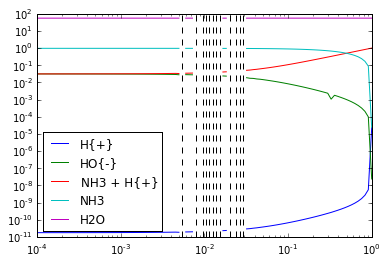

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
ny = len(rs.substances)
nc = 100
x = np.empty((nc, ny))
Hparr = np.logspace(-4, 0, nc)
success = []
for idx in range(nc):
    x00 = x0[:]
    x00[0] = Hparr[idx]
    resx, res = rs.root(x00, scaling=1e12)
    success.append(res.success)
    x[idx, :] = resx
for idx_s in range(ny):
    plt.loglog(Hparr, x[:, idx_s], label=rs.substances[idx_s].name)
plt.legend(loc='best')
for i, s in enumerate(success):
    if s is False:
        plt.axvline(Hparr[i], c='k', ls='--')

(False, (100, 5))

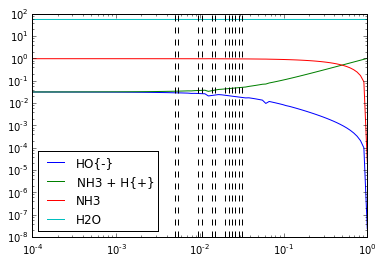

In [27]:
Cout_14, success = rs.plot(init_conc, Hp, np.logspace(-4, 0, nc), scaling=1e14, method='hybr')
all(success), Cout_14.shape #, list(success)

True

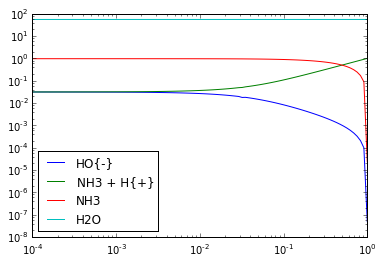

In [48]:
_, success = rs.plot(init_conc, Hp, np.logspace(-4, 0, nc), scaling=1e-8, method='hybr', init_iter=20)
all(success)

(True, (100, 5))

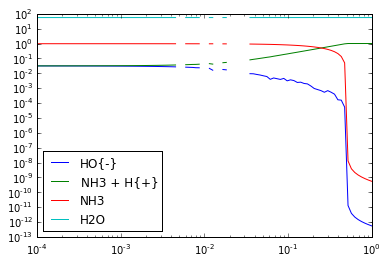

In [49]:
Cout, success = rs.plot(Cout_14, Hp, np.logspace(-4, 0, nc), scaling=1e-8, init_iter=0, method='lm')
all(success), Cout.shape

False

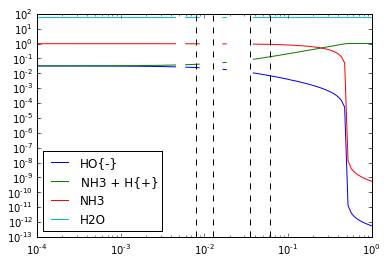

In [29]:
Cout, success = rs.plot(Cout_14, Hp, np.logspace(-4, 0, nc), scaling=1, logC=True, init_iter=0, method='lm')
all(success)

In [23]:
#Cout, success = reqsys.plot(init_conc, Hp, np.logspace(-4, 0, 20), scaling=1e2)

In [24]:
x0

In [25]:
from aqchem.equilibria import solve_equilibrium
print(x0)
for w in range(1,5):
    for eq in rs.rxns:
        new_x0 = solve_equilibrium(x0, eq.net_stoich(rs.substances), eq.params)
        x0 = (w*x0 + new_x0)/(w+1)
        print(x0)

[1e-07, 1e-07, 1e-07, 1.0, 55.5]
[  4.2249e-07   4.2249e-07   1.0000e-07   1.0000e+00   5.5500e+01]
[  2.1125e-07   4.2249e-07   3.1125e-07   1.0000e+00   5.5500e+01]
[  3.5643e-07   5.6768e-07   3.1125e-07   1.0000e+00   5.5500e+01]
[  2.3762e-07   5.6768e-07   4.3006e-07   1.0000e+00   5.5500e+01]
[  3.2772e-07   6.5778e-07   4.3006e-07   1.0000e+00   5.5500e+01]
[  2.4579e-07   6.5778e-07   5.1199e-07   1.0000e+00   5.5500e+01]
[  3.1002e-07   7.2201e-07   5.1199e-07   1.0000e+00   5.5500e+01]
[  2.4802e-07   7.2201e-07   5.7399e-07   1.0000e+00   5.5500e+01]
